In [9]:
import pylab
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
%matplotlib inline
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.interpolate import make_interp_spline
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

In [12]:
dat=pd.read_excel("Data/RLMAT159.xlsx")
dat

,Wavelength (nm),A,B,B2,Bm,C,C2,Cm,D,D2,...,F,F2,Fm,G,G2,Gm,H,H2,Hm,I
0,436.059998,17.501556,18.599356,18.883934,18.741645,27.192190,20.451414,23.821802,17.271582,20.379269,...,21.234838,19.234076,20.234457,12.636235,26.135704,19.385970,16.188194,14.984716,15.586455,20.297724
1,436.959992,6.317105,8.231932,8.451962,8.341947,7.874425,8.155256,8.014841,6.285391,9.231087,...,10.099129,8.046389,9.072759,6.535158,11.536390,9.035774,9.631348,7.242352,8.436850,10.485497
2,438.029999,4.712414,5.766370,6.912728,6.339549,4.400719,5.735736,5.068228,4.986106,6.270949,...,8.117542,6.373403,7.245473,5.807134,9.781398,7.794266,8.231668,5.067959,6.649814,8.415561
3,438.929993,4.033108,5.871823,5.961953,5.916888,4.008291,5.269429,4.638860,4.148211,5.607706,...,7.704016,5.572203,6.638109,4.671384,9.050923,6.861154,7.390622,5.848423,6.619522,6.960873
4,440.000000,3.511232,4.364423,5.576251,4.970337,3.885929,5.032727,4.459328,3.706902,5.439076,...,7.725523,4.893964,6.309743,4.728350,9.363987,7.046168,6.875919,5.989841,6.432880,6.269108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,696.049988,0.104799,0.157052,0.081209,0.119130,0.092957,0.103481,0.098219,0.028633,0.005580,...,7.284165,1.110998,4.197582,7.879664,4.828999,6.354332,7.776159,8.014381,7.895270,7.448941
261,697.039978,0.081511,0.096878,0.160182,0.128530,0.110408,0.041011,0.075710,0.011585,0.051159,...,7.169671,1.117178,4.143424,7.227212,5.157356,6.192284,8.343122,7.897820,8.120471,7.413600
262,698.020019,0.160266,0.196092,0.125622,0.160857,0.076068,0.046226,0.061147,0.022934,0.055718,...,6.682249,1.128133,3.905191,6.311453,4.440708,5.376081,7.395588,8.030424,7.713006,6.884177
263,699.010010,0.103914,0.176662,-0.045677,0.065493,0.111779,0.104911,0.108345,0.039886,0.178202,...,6.783657,1.170251,3.976954,6.727924,4.449570,5.588747,6.572126,7.187504,6.879815,6.557683


In [35]:
x = list(dat['Wavelength (nm)'])
ys=[]
ys.append(list(dat['A']))
ys.append(list(dat['Bm']))
ys.append(list(dat['Cm']))
ys.append(list(dat['Dm']))
ys.append(list(dat['Em']))
ys.append(list(dat['Fm']))
ys.append(list(dat['Gm']))
ys.append(list(dat['Hm']))
ys.append(list(dat['I']))

Concs={'A':0.1,'Bm':0.2,'Cm':0.3,'Dm':0.4,'Em':0.6,'Fm':0.8,'Gm':1,'Hm':1.5,'I':2.0}

Letters=['A','Bm','Cm','Dm','Em','Fm','Gm','Hm','I']

In [36]:
bs=[]
for i in range(0,len(ys)):
    bs.append(np.max(ys[i]))



In [37]:

InsetX

[0.1, 0.2, 0.3, 0.4, 0.6, 0.8, 1, 1]

In [38]:
#a1 = mpatches.Patch(facecolor='#ff0000', label='$\mathregular{Hg^{+}}$', linewidth = 0.5, edgecolor = 'black')
#a2 = mpatches.Patch(facecolor='#ff8000', label = '$\mathregular{K^{+}}$', linewidth = 0.5, edgecolor = 'black')
#a3 = mpatches.Patch(facecolor='#FFC600', label='$\mathregular{Cs^{+2}}$', linewidth = 0.5, edgecolor = 'black')


/var/folders/0l/sqknt5xn1w3dx48zsbjg_7800000gn/T/ipykernel_7313/655702805.py:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


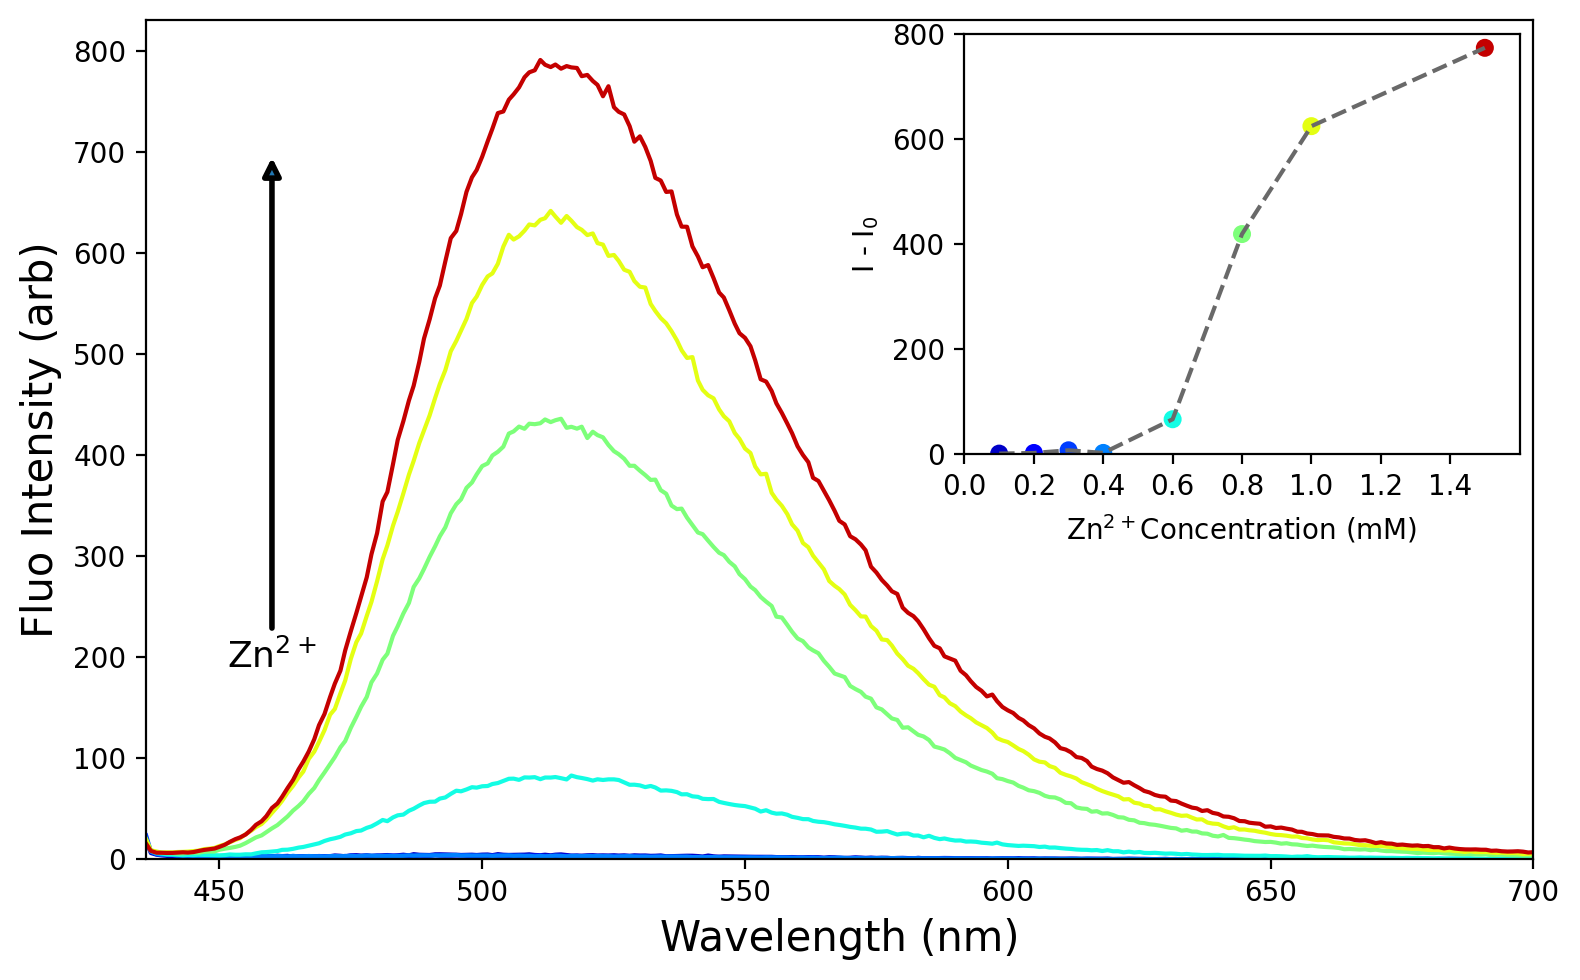

In [50]:
InsetX=[]
InsetY=[]
InsetCols=[]

plt.figure(figsize=(8,5),dpi=200)
for i in range(0,len(ys)):
    if(Concs[Letters[i]]<1.6):
        col = plt.cm.jet(Concs[Letters[i]]/1.6)
        plt.plot(x,ys[i],color=col)
        InsetX.append(Concs[Letters[i]])
        InsetY.append(bs[i]-min(bs))
        InsetCols.append(col)
                        


pylab.ylim(0,)
pylab.xlim(436,700)
pylab.xlabel("Wavelength (nm)", fontsize=15)
pylab.ylabel("Fluo Intensity (arb)",fontsize=15)

ax = plt.gcf().gca()
ax.annotate('$\mathregular{Zn^{2+}}$', 
            xy=(460, 700),
            xycoords='data',
            xytext=(460, 200), 
            va='center',
            ha='center',
            fontsize=13,
            arrowprops={'arrowstyle': '-|>', 'lw': 2})
#axins = inset_axes(ax, width=50, height=50)
#axins2 = inset_axes(ax, width="40%", height="50%", loc=1)
#plt.scatter(a,c)

#cubic_interpolation_model = interp1d(a, c, kind = "cubic")
 
# Plotting the Graph
#a_=np.linspace(a.min(), a.max(), 500)
#c_=cubic_interpolation_model(a_)
 


#plt.plot(a_, c_)
#pylab.ylim(0,800)
#pylab.xlim(0,22)
#pylab.xticks(np.arange(0, 22, step=5))
#pylab.xlabel("$\mathregular{Hg^{2+}}$Concentration ($\mu$M)", fontsize=15)
#pylab.ylabel("I - $\mathregular{I_{0}}$ ",fontsize=15)
axins2 = inset_axes(ax, width="40%", height="50%", loc=1)
plt.scatter(InsetX,InsetY,c=InsetCols,s=30)
plt.plot(np.sort(InsetX),np.array(InsetY)[np.argsort(InsetX)],'--',color='dimgrey')
cubic_interpolation_model = interp1d(InsetX,InsetY, kind = "cubic")
 
# Plotting the Graph
a_=np.linspace(min(InsetX), max(InsetX), 500)
c_=cubic_interpolation_model(a_)
 


#plt.plot(a_, Fitfunc(a_,thecurve[0][0],thecurve[0][1]))
pylab.ylim(0,800)
pylab.xlim(0,1.6)
plt.xticks(np.arange(0,1.6,0.2))
#pylab.xticks(np.arange(0, 10, step=5))
#plt.semilogx()
pylab.xlabel("$\mathregular{Zn^{2+}}$Concentration (mM)")
pylab.ylabel("I - $\mathregular{I_{0}}$ ")


plt.tight_layout()
plt.savefig('Figs/Fig11a.png',bbox_inches='tight')

plt.show()

In [44]:

plt.figure(figsize=(15,10))
plt.scatter(v,w) 
g, h = np.polyfit(v, w, 1)
plt.plot(v, g*v+h)

cubic_interpolation_model = interp1d(v, w, kind = "cubic")
 
# Plotting the Graph
v_=np.linspace(v.min(), v.max(), 500)
w_=cubic_interpolation_model(v_)
 
plt.plot(v_, w_)

#plt.plot(a3,c3)
pylab.ylim(-10,850)
pylab.xlim(-0.1,2.1)
pylab.xlabel("$\mathregular{Hg^{2+}}$Concentration (uM)", fontsize=15)
pylab.ylabel("I - $\mathregular{I_{0}}$ ",fontsize=15)

plt.savefig('Fig10b.jpg')

NameError: name 'v' is not defined

<Figure size 1080x720 with 0 Axes>

In [ ]:
#testing curve fit for the inset
plt.figure(figsize=(15,10))
plt.scatter(a,c)